In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import csv

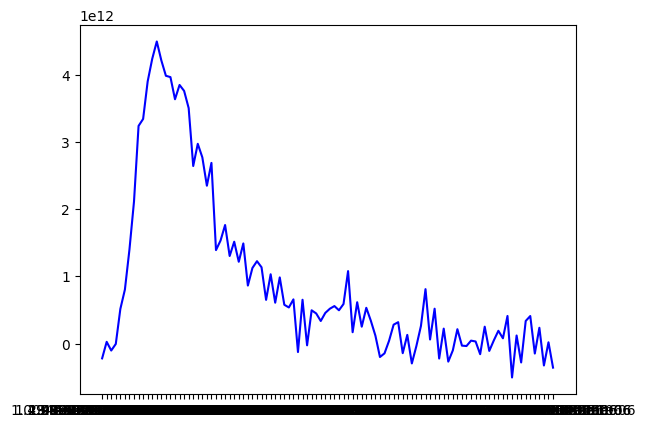

In [ ]:
x_data1 = []
y_data1 = []

with open('d1.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    for row in plots:
        x_data1.append(row[0])
        y_data1.append(float(row[1]))
                 
plt.plot(x_data1, y_data1, color = 'b')
plt.show()

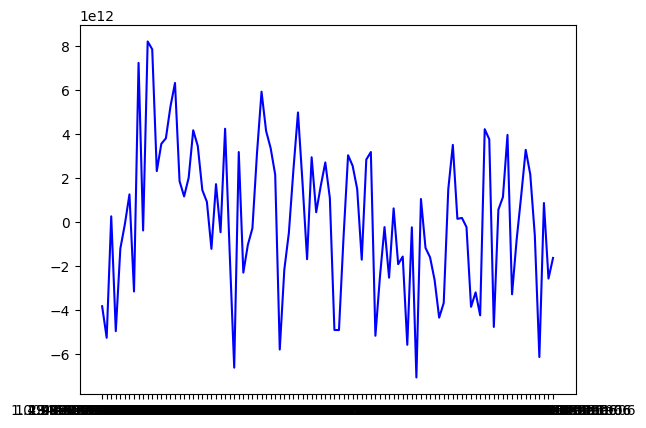

In [ ]:
x_data2 = []
y_data2 = []

with open('d2.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    for row in plots:
        x_data2.append(row[0])
        y_data2.append(float(row[1]))
                 
plt.plot(x_data2, y_data2, color = 'b')
plt.show()

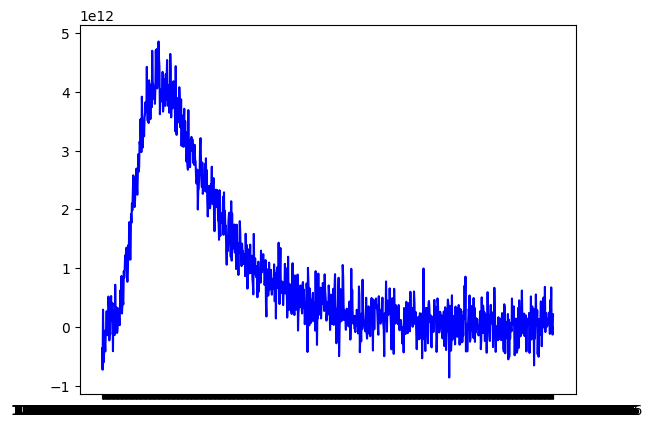

In [ ]:
x_data3 = []
y_data3 = []

with open('d3.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    for row in plots:
        x_data3.append(row[0])
        y_data3.append(float(row[1]))
                 
plt.plot(x_data3, y_data3, color = 'b')
plt.show()

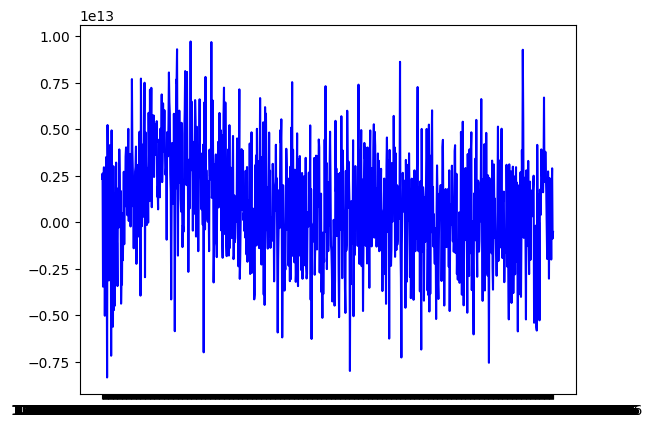

In [ ]:
x_data4 = []
y_data4 = []

with open('d4.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    for row in plots:
        x_data4.append(row[0])
        y_data4.append(float(row[1]))
                 
plt.plot(x_data4, y_data4, color = 'b')
plt.show()

In [12]:
def planck(l, h, c, k, t):
    return (2 * h * c * c) / ((l ** 5) * ((np.exp(np.clip((h * c) / (l * k * t), None, 700))) - 1))

In [25]:
values_x = np.array(x_data3)
values_y = np.array(y_data3)
initial_guess = [5000, 3e8, 6.626e-34, 1.38e-23]
args, covar = scipy.optimize.curve_fit(planck, values_x, values_y, p0 = initial_guess)
print("ARGS", args)

ARGS [5.000e+03 3.000e+08 6.626e-34 1.380e-23]


/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [26]:
h, c, k, t = float(args[0]), float(args[1]), float(args[2]), float(args[3])

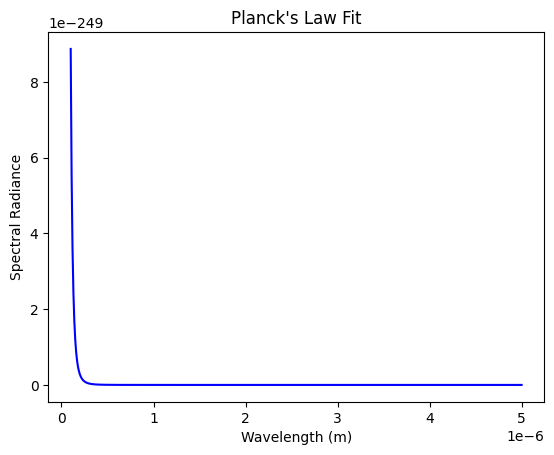

In [31]:
x_data3 = np.array(x_data3, dtype=float)
y_est3 = planck(np.array(x_data3), h, c, k, t) 
plt.plot(x_data3, y_est3, color='b')
plt.xlabel("Wavelength (m)")
plt.ylabel("Spectral Radiance")
plt.title("Planck's Law Fit")
plt.show()

In [47]:
values_x = np.array(x_data4)
values_y = np.array(y_data4)
initial_guess = [5000, 3e8, 6.626e-34, 1.38e-23]
args, covar = scipy.optimize.curve_fit(planck, values_x, values_y, p0 = initial_guess)
print("ARGS", args)

ARGS [5.000e+03 3.000e+08 6.626e-34 1.380e-23]


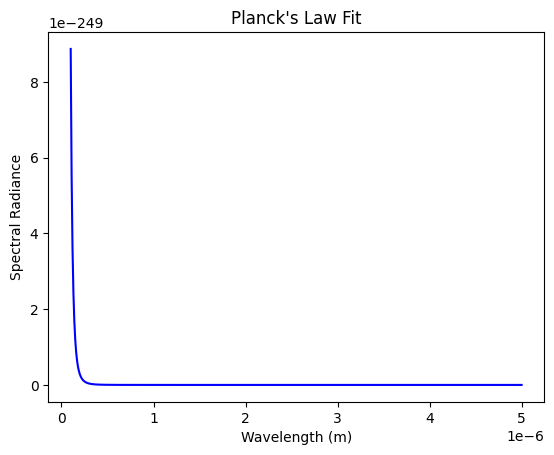

In [48]:
h, c, k, t = float(args[0]), float(args[1]), float(args[2]), float(args[3])
x_data4 = np.array(x_data4, dtype=float)
y_est4 = planck(np.array(x_data4), h, c, k, t) 
plt.plot(x_data4, y_est4, color='b')
plt.xlabel("Wavelength (m)")
plt.ylabel("Spectral Radiance")
plt.title("Planck's Law Fit")
plt.show()

In [37]:
# Planck's law with fixed c, h, k
def planck_fixed_constants(wavelength, T):
    h = 6.626e-34  # Planck's constant in J·s
    c = 3e8        # Speed of light in m/s
    k = 1.38e-23   # Boltzmann constant in J/K
    return (2 * h * c**2) / (wavelength**5 * (np.exp((h * c) / (wavelength * k * T)) - 1))

# Perform curve fitting only for T
params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data3, y_data3, p0=[5000])

# Extract fitted temperature
T_fit = params[0]
print(f"Estimated T: {T_fit}")


Estimated T: 4003.9998668987323


In [38]:
# Planck's law with fixed T, c, and k, and fitting for h
def planck_fixed_T(wavelength, h):
    T = T_fit   # Use the previously estimated value of T
    c = 3e8     # Speed of light
    k = 1.38e-23  # Boltzmann constant
    return (2 * h * c**2) / (wavelength**5 * (np.exp((h * c) / (wavelength * k * T)) - 1))

# Perform curve fitting only for h
params, covariance = scipy.optimize.curve_fit(planck_fixed_T, x_data3, y_data3, p0=[6.626e-34])

# Extract fitted Planck constant
h_fit = params[0]
print(f"Estimated h: {h_fit}")


Estimated h: 6.6236729388683844e-34


In [40]:
# Planck's law with fixed T, c, and h, and fitting for k
def planck_fixed_T_h(wavelength, k):
    T = T_fit    # Use the previously estimated value of T
    h = h_fit    # Use the previously estimated value of h
    c = 3e8      # Speed of light
    return (2 * h * c**2) / (wavelength**5 * (np.exp((h * c) / (wavelength * k * T)) - 1))

# Perform curve fitting only for k
params, covariance = scipy.optimize.curve_fit(planck_fixed_T_h, x_data3, y_data3, p0=[1.38e-23])

# Extract fitted Boltzmann constant
k_fit = params[0]
print(f"Estimated k: {k_fit}")


Estimated k: 1.3796134441403946e-23


In [41]:
# Planck's law with fixed T, c, and h, and fitting for k
def planck_fixed_T_h(wavelength, c):
    T = T_fit    # Use the previously estimated value of T
    h = h_fit    # Use the previously estimated value of h
    k = k_fit      # Speed of light
    return (2 * h * c**2) / (wavelength**5 * (np.exp((h * c) / (wavelength * k * T)) - 1))

# Perform curve fitting only for k
params, covariance = scipy.optimize.curve_fit(planck_fixed_T_h, x_data3, y_data3, p0=[3e8])

# Extract fitted Boltzmann constant
c_fit = params[0]
print(f"Estimated c: {c_fit}")


Estimated c: 299639881.13361055


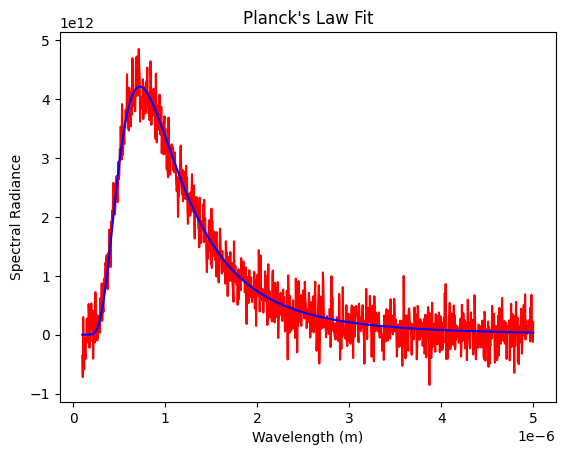

In [57]:
h, c, k, t = h_fit, c_fit, k_fit, T_fit
x_data3 = np.array(x_data3, dtype=float)
y_est3 = planck(np.array(x_data3), h, c, k, t) 
plt.xlabel("Wavelength (m)")
plt.ylabel("Spectral Radiance")
plt.title("Planck's Law Fit")
plt.plot(x_data3, y_data3, color = 'r')
plt.plot(x_data3, y_est3, color='b')
plt.show()

In [49]:
# Planck's law with fixed c, h, k
def planck_fixed_constants(wavelength, T):
    h = 6.626e-34  # Planck's constant in J·s
    c = 3e8        # Speed of light in m/s
    k = 1.38e-23   # Boltzmann constant in J/K
    return (2 * h * c**2) / (wavelength**5 * (np.exp((h * c) / (wavelength * k * T)) - 1))

# Perform curve fitting only for T
params, covariance = scipy.optimize.curve_fit(planck_fixed_constants, x_data3, y_data3, p0=[5000])

# Extract fitted temperature
T_fit = params[0]
print(f"Estimated T: {T_fit}")


Estimated T: 4003.9998668987323


In [50]:
# Planck's law with fixed T, c, and k, and fitting for h
def planck_fixed_T(wavelength, h):
    T = T_fit   # Use the previously estimated value of T
    c = 3e8     # Speed of light
    k = 1.38e-23  # Boltzmann constant
    return (2 * h * c**2) / (wavelength**5 * (np.exp((h * c) / (wavelength * k * T)) - 1))

# Perform curve fitting only for h
params, covariance = scipy.optimize.curve_fit(planck_fixed_T, x_data3, y_data3, p0=[6.626e-34])

# Extract fitted Planck constant
h_fit = params[0]
print(f"Estimated h: {h_fit}")


Estimated h: 6.6236729388683844e-34


In [51]:
# Planck's law with fixed T, c, and h, and fitting for k
def planck_fixed_T_h(wavelength, c):
    T = T_fit    # Use the previously estimated value of T
    h = h_fit    # Use the previously estimated value of h
    k = k_fit      # Speed of light
    return (2 * h * c**2) / (wavelength**5 * (np.exp((h * c) / (wavelength * k * T)) - 1))

# Perform curve fitting only for k
params, covariance = scipy.optimize.curve_fit(planck_fixed_T_h, x_data3, y_data3, p0=[3e8])

# Extract fitted Boltzmann constant
c_fit = params[0]
print(f"Estimated c: {c_fit}")


Estimated c: 299639881.13361055


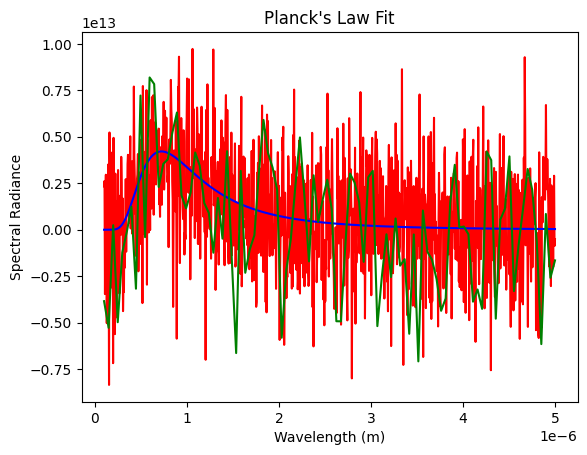

In [53]:
h, c, k, t = h_fit, c_fit, k_fit, T_fit
x_data4 = np.array(x_data4, dtype=float)
y_est4 = planck(np.array(x_data4), h, c, k, t) 
plt.xlabel("Wavelength (m)")
plt.ylabel("Spectral Radiance")
plt.title("Planck's Law Fit")
plt.plot(x_data4, y_data4, color = 'r')
plt.plot(x_data4, y_est4, color='b')
plt.plot(x_data2, y_data2, color = 'g')
plt.show()